## Introduction

    Carried out on 200701, by Simon Birgersson


*Lund university, Center for Molecular Protein Science (CMPS), Henrik Stålbrand Group.*

*** 
**Purpose:**  

This is an example of my workflow for calculating the results of an PNP assay, data is taken from work done 200701 for *Ag*a27A, a commercially available GH27 enzyme.

    

In [5]:
# initial imports
from utils.activity_assay import Standard,Enzyme
import numpy as np
import matplotlib.pyplot as plt

## Standard data
Here is where is input the standard data and handle raw data input, blanks, eventual points to remove, etc.

In [6]:
# Standard data
# concentration values for standard series of PNP [mM]
std_c   = np.array([0.04, 0.08, 0.12, 0.16, 0.20, 0.25, 0.30, 0.45, 0.60]) # [mM]

# raw data for std curve, absorbance values minus mean of blanks [AU]
std_abs = np.array([[0.279, 0.486, 0.703, 0.869, 1.118, 1.429, 1.728, 2.393, 3.074],
                    [0.279, 0.492, 0.707, 0.896, 1.111, 1.351, 1.637, 2.384, 3.064]])-np.array([0.086,0.085]).mean() 

# initialize standard object.          
std = Standard(
        absorbance=std_abs,
        concentration=std_c,
        x_unit="mM",
        y_unit="AU",
    )
    
print(std)

Standard Data: 
      mM  abs #1  abs #2  mean [AU]  +/- [AU]
0  0.04  0.1935  0.1935     0.1935    0.0000
1  0.08  0.4005  0.4065     0.4035    0.0030
2  0.12  0.6175  0.6215     0.6195    0.0020
3  0.16  0.7835  0.8105     0.7970    0.0135
4  0.20  1.0325  1.0255     1.0290    0.0035
5  0.25  1.3435  1.2655     1.3045    0.0390
6  0.30  1.6425  1.5515     1.5970    0.0455
7  0.45  2.3075  2.2985     2.3030    0.0045
8  0.60  2.9885  2.9785     2.9835    0.0050  

Resulting std equation is:

    abs = c * 5.03 + 0.02

With an R^2 of 0.9984


## Sample data
Here I input the raw data for my sample, same here all the raw data processing is done here before analysis.

In [7]:
# Sample data
# raw data for std curve, absorbance values minus mean of enzyme blanks [AU]
sample_abs = np.array([[3.484, 1.287, 1.078, 1.088, 1.081, 1.033, 1.083, 1.236, 1.050, 1.028],
                    [3.429, 1.322, 1.014, 1.033, 1.017, 1.038, 1.033, 1.127, 0.976, 1.035,]])-np.array([0.116, 0.120]).mean()

# dilution factors of samples
sample_dil = np.array([4, 40, 400, 1600, 6400, 25600, 38400, 57600, 86400, 172800])

# stock enzyme concentration according to nanodrop determination [mg/ml]
Aga27A_stock_conc = 0.57 # mg/ml

#initialize Enzyme object
Aga27A = Enzyme(absorbance = sample_abs,
                Name= "Aga27A against PNP-gal in H2O (centrifuged) 200701",
                regr=std.fit,
                time=15.0,
                dilution_factor=sample_dil,
                x_unit = "mM",
            )

print(Aga27A)

Aga27A against PNP-gal in H2O (centrifuged) 200701: 
    abs #1  abs #2  mean [AU]  +/- [AU]  conc. analyte [mM]  +/- [mM]  \
0   3.366   3.311     3.3385    0.0275            0.660067  0.001843   
1   1.169   1.204     1.1865    0.0175            0.232251  0.000145   
2   0.960   0.896     0.9280    0.0320            0.180862  0.002738   
3   0.970   0.915     0.9425    0.0275            0.183744  0.001843   
4   0.963   0.899     0.9310    0.0320            0.181458  0.002738   
5   0.915   0.920     0.9175    0.0025            0.178774  0.003127   
6   0.965   0.915     0.9400    0.0250            0.183247  0.001346   
7   1.118   1.009     1.0635    0.0545            0.207799  0.007211   
8   0.932   0.858     0.8950    0.0370            0.174301  0.003732   
9   0.910   0.917     0.9135    0.0035            0.177979  0.002928   

   activity [nkat/ml]  +/- [nkat/ml]  
0            0.004400   6.270265e+01  
1            0.015483   6.270265e+02  
2            0.120575   6.270265e+03

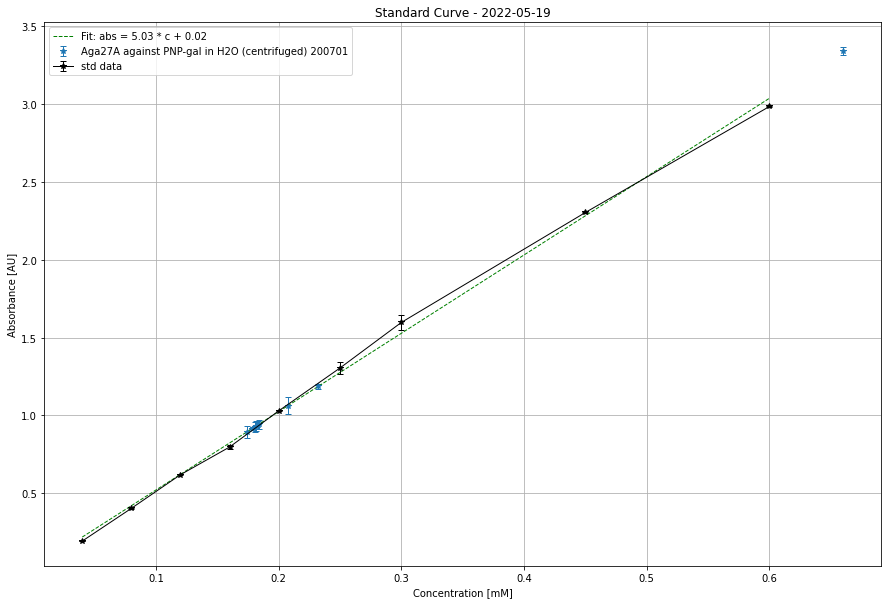

In [8]:
# Print the results:
plt.figure(figsize=[15,10])
Aga27A.plot()
std.plot()

plt.show()

It's visible that one of the point ends up outside of the standard curve, and thus cannot be quantifiable. 